<a href="https://colab.research.google.com/github/bajpaidevharsh/movie_recomender_system-imdb-dataset-/blob/main/notebook4401393b1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'movie-genre-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3545508%2F6178340%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240723%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240723T135813Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D66ceb2ffcc9cb6c862a3cfecedbe81d7c4ef5edfc46b1ebabaf743166452a125e6501b6b312005a7653d1297931319f55941bcdb76a65fb92dd32af6d6a30bb23655c00bc5e8d8987fed9c93839da573ba3d4fc9beed8f7e10ec27dfc420b2cec7d045ba817cff169e91a9058200b5f075720a900ffbb046bddc56df14c7292d08c9c6621eddf957c70a022ec935690bbe6d185dc1a9e14e421355c6cc1608b3ebb62f25159bfe38899ea27a15fad5e3116a0cb65d43c741fdc8271805e047bbf6462a52a2a2cdb0ac2c1554c4703c4ee19375ccba3bc6082810f70e76be70af99030f1e51bc02f498ec62bd9ccb944a11e7a8da195f4d45e66d0727f771d531'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 7273709 bytes downloaded
Downloaded and uncompressed: movie-genre-prediction
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-genre-prediction/train.csv
/kaggle/input/movie-genre-prediction/test.csv
/kaggle/input/movie-genre-prediction/sample_submission.csv


**inport dependencies**

In [3]:
import pandas
import numpy
import matplotlib.pyplot

In [4]:
import tensorflow_hub as hub

In [5]:
import tensorflow

**getting the initial data**

In [6]:
dev=pandas.read_csv('/kaggle/input/movie-genre-prediction/train.csv')

In [7]:
dev.head(5)

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action


**dropping the unnecessary axis**

In [8]:
dev.drop('movie_name',axis=1,inplace=True)

In [9]:
dev.drop('id',axis=1,inplace=True)

In [10]:
dev

,synopsis,genre
0,A young scriptwriter starts bringing valuable ...,fantasy
1,A director and her friends renting a haunted h...,horror
2,This is an educational video for families and ...,family
3,Scientists working in the Austrian Alps discov...,scifi
4,Buy Day - Four Men Widely - Apart in Life - By...,action
...,...,...
53995,Two loser pest control buddies find themselves...,scifi
53996,A seductive woman gets involved in relationshi...,thriller
53997,"Duyen, a wedding dress staff, who decides to c...",romance
53998,The people of a crowded colony in Coimbatore c...,action


**total genres**

In [11]:
len(dev.genre.value_counts())

10

**loading the USE(universal sentence encoder)**

In [12]:
base_model=hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',)

In [13]:
model=tensorflow.keras.Sequential([tensorflow.keras.layers.Input(shape=[],dtype=tensorflow.string),
                                   base_model,
                                   tensorflow.keras.layers.Dense(10,activation='softmax')])

In [14]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**converting genres string to int**

In [15]:
kk=list(dev.genre.unique())

In [16]:
lt=[]
for i in dev.genre:
  lt.append(kk.index(i))

In [17]:
len(dev.genre)==len(lt)

True

In [18]:
dev['genre']=lt

In [19]:
dev

,synopsis,genre
0,A young scriptwriter starts bringing valuable ...,0
1,A director and her friends renting a haunted h...,1
2,This is an educational video for families and ...,2
3,Scientists working in the Austrian Alps discov...,3
4,Buy Day - Four Men Widely - Apart in Life - By...,4
...,...,...
53995,Two loser pest control buddies find themselves...,3
53996,A seductive woman gets involved in relationshi...,9
53997,"Duyen, a wedding dress staff, who decides to c...",8
53998,The people of a crowded colony in Coimbatore c...,4


In [20]:
dev.genre=tensorflow.keras.utils.to_categorical(dev.genre,num_classes=10)

**splitting into test and train data**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(dev['synopsis'],dev['genre'],test_size=0.2)

**fitting the data to the model**

In [23]:
history=model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
1350/1350 [==============================] - 32s 21ms/step - loss: 0.5666 - accuracy: 0.8945 - val_loss: 0.3300 - val_accuracy: 0.9020
Epoch 2/10
1350/1350 [==============================] - 28s 21ms/step - loss: 0.3122 - accuracy: 0.8985 - val_loss: 0.2949 - val_accuracy: 0.9025
Epoch 3/10
1350/1350 [==============================] - 29s 21ms/step - loss: 0.2927 - accuracy: 0.8982 - val_loss: 0.2838 - val_accuracy: 0.9024
Epoch 4/10
1350/1350 [==============================] - 27s 20ms/step - loss: 0.2851 - accuracy: 0.8981 - val_loss: 0.2779 - val_accuracy: 0.9035
Epoch 5/10
1350/1350 [==============================] - 28s 21ms/step - loss: 0.2812 - accuracy: 0.8981 - val_loss: 0.2749 - val_accuracy: 0.9029
Epoch 6/10
1350/1350 [==============================] - 27s 20ms/step - loss: 0.2789 - accuracy: 0.8982 - val_loss: 0.2733 - val_accuracy: 0.9030
Epoch 7/10
1350/1350 [==============================] - 27s 20ms/step - loss: 0.2774 - accuracy: 0.8981 - val_loss: 0.2728 -

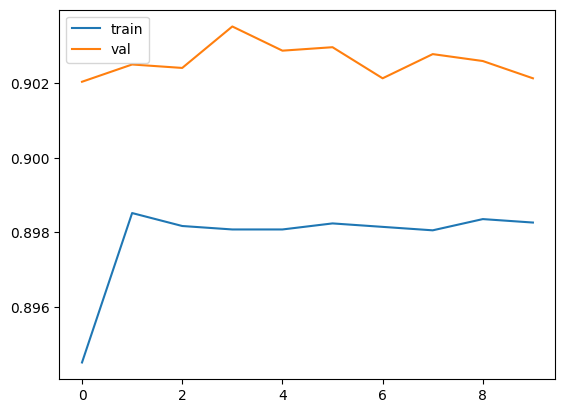

In [24]:
dev,(harsh)=matplotlib.pyplot.subplots()
harsh=matplotlib.pyplot.plot(history.history['accuracy'])
harsh=matplotlib.pyplot.plot(history.history['val_accuracy'])
harsh=matplotlib.pyplot.legend(['train','val'])

**importing the imdb dataset for predictions**

In [25]:
data=pandas.read_csv('/content/imdb_top_1000.csv')

In [26]:
data.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [40]:
data.shape

(1000, 16)

**final predictions**

In [48]:
movie_genre=int(input(f'choose the fantasy index from 1 to 10{kk}'))
if movie_genre>10 or movie_genre<1:
  print('invalid input')
else:
  movie_genre=kk[movie_genre-1]
  for i in range(1,1000):
    predictions=model.predict([data['Overview'][i]])
    print(predictions)
    index=numpy.argmax(predictions)
    if kk[index]==movie_genre:
      print('the movie you should watch :- '+data['Series_Title'][i])
      break
    else:
      continue

choose the fantasy index from 1 to 10['fantasy', 'horror', 'family', 'scifi', 'action', 'crime', 'adventure', 'mystery', 'romance', 'thriller']2
1/1 [==============================] - 0s 58ms/step
[[9.3642586e-01 6.3552186e-02 2.6024829e-06 2.7336594e-06 2.6696468e-06
  2.8462887e-06 2.7359181e-06 2.6060841e-06 2.9550297e-06 2.7370506e-06]]
1/1 [==============================] - 0s 76ms/step
[[9.0117788e-01 9.8814242e-02 9.4727380e-07 9.6488918e-07 9.3843511e-07
  9.4263288e-07 9.9920283e-07 9.7301904e-07 9.7588315e-07 1.0181294e-06]]
1/1 [==============================] - 0s 58ms/step
[[9.8964685e-01 1.0343688e-02 1.0881100e-06 1.2223991e-06 1.1614884e-06
  1.1828006e-06 1.2639426e-06 1.0988930e-06 1.1587467e-06 1.1893294e-06]]
1/1 [==============================] - 0s 55ms/step
[[9.9133390e-01 8.4258150e-03 3.0023302e-05 2.9874271e-05 2.8870760e-05
  3.0510415e-05 3.0464535e-05 2.9510686e-05 2.9580846e-05 3.1553274e-05]]
1/1 [==============================] - 0s 49ms/step
[[3.6190104